In [18]:
%load_ext autoreload
%autoreload 2
%aimport -sympy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from src.planttraits.datasets.plant_traits_dataset import PlantTraitsDataset
from src.planttraits.models.example_model import PTNN, kwargs
from planttraits.utils import TARGET_COLUMN_NAMES
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers.tensorboard import TensorBoardLogger
import torch 
import matplotlib.pyplot as plt
import os 
from pathlib import Path 
import pandas as pd

In [20]:
train_dataset = PlantTraitsDataset()
test_dataset = PlantTraitsDataset(preprocessors=train_dataset.return_preprocessors())
val_dataset = PlantTraitsDataset(eval=True, preprocessors=train_dataset.return_preprocessors())

### Modis Vod

In [21]:
preps = train_dataset.return_preprocessors()
modis_prep = preps['modis_vod']
cols = modis_prep.columns
train_modis = train_dataset.data[cols]
display(train_modis.head())

,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12,...,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m3,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m4,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m5,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m6,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m7,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m8,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m9,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m10,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m11,MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m12
id,,,,,,,,,,,,,,,,,,,,,
191255167,0.959629,1.690024,-0.290565,-0.902835,1.010520,-0.731333,-1.048512,0.668641,-0.993454,0.803626,...,0.599221,0.368827,0.861548,1.476500,1.573498,1.562217,1.395835,0.916068,0.598678,1.606683
196514232,-1.032520,0.099913,-0.505470,0.031727,1.146085,0.263241,-0.307446,0.584049,0.107196,-0.848648,...,0.482524,0.862181,1.272051,1.607151,1.587361,1.376091,1.300722,1.159873,0.699125,0.271107
149966009,0.433492,-0.556455,0.476111,0.955727,-0.793090,0.293944,0.710250,-0.552695,0.296227,0.390543,...,-1.027013,-1.080839,-1.175863,-1.396041,-1.316599,-1.265784,-1.038624,-0.955819,-0.800274,-0.842282
195623599,-0.115828,-0.342053,0.284719,0.799157,0.066389,0.490414,0.501150,-0.198139,0.478483,0.111713,...,-0.206579,0.012833,0.270764,0.524416,0.474792,0.337906,0.161839,-0.090589,-0.282341,-0.428372
183372069,-0.240557,0.042857,0.032672,-0.467565,0.636635,-0.581598,-0.064493,0.343358,-0.046194,-0.122527,...,-0.101625,0.044161,0.189780,0.238188,0.370198,0.457474,0.526075,0.465631,0.309488,0.125340


In [22]:
print(train_modis.columns.tolist())

['MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m12', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2', 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m

In [23]:
test_col = f"MODIS_2000.2020_monthly_mean_surface_reflectance_band_14_._month_m10"

if test_col in train_modis.columns:
    print("Istnieje")
else:
    print("Nie istnieje")


Istnieje


### Soil

In [24]:
preps = train_dataset.return_preprocessors()
soil_prep = preps['soil']
cols = soil_prep.columns

In [25]:
cols

['SOIL_bdod_0.5cm_mean_0.01_deg',
 'SOIL_bdod_100.200cm_mean_0.01_deg',
 'SOIL_bdod_15.30cm_mean_0.01_deg',
 'SOIL_bdod_30.60cm_mean_0.01_deg',
 'SOIL_bdod_5.15cm_mean_0.01_deg',
 'SOIL_bdod_60.100cm_mean_0.01_deg',
 'SOIL_cec_0.5cm_mean_0.01_deg',
 'SOIL_cec_100.200cm_mean_0.01_deg',
 'SOIL_cec_15.30cm_mean_0.01_deg',
 'SOIL_cec_30.60cm_mean_0.01_deg',
 'SOIL_cec_5.15cm_mean_0.01_deg',
 'SOIL_cec_60.100cm_mean_0.01_deg',
 'SOIL_cfvo_0.5cm_mean_0.01_deg',
 'SOIL_cfvo_100.200cm_mean_0.01_deg',
 'SOIL_cfvo_15.30cm_mean_0.01_deg',
 'SOIL_cfvo_30.60cm_mean_0.01_deg',
 'SOIL_cfvo_5.15cm_mean_0.01_deg',
 'SOIL_cfvo_60.100cm_mean_0.01_deg',
 'SOIL_clay_0.5cm_mean_0.01_deg',
 'SOIL_clay_100.200cm_mean_0.01_deg',
 'SOIL_clay_15.30cm_mean_0.01_deg',
 'SOIL_clay_30.60cm_mean_0.01_deg',
 'SOIL_clay_5.15cm_mean_0.01_deg',
 'SOIL_clay_60.100cm_mean_0.01_deg',
 'SOIL_nitrogen_0.5cm_mean_0.01_deg',
 'SOIL_nitrogen_100.200cm_mean_0.01_deg',
 'SOIL_nitrogen_15.30cm_mean_0.01_deg',
 'SOIL_nitrogen_30.60c

In [26]:
len(cols)

61

### Worldclim Bio

In [27]:
preps = train_dataset.return_preprocessors()
worldclim_prep = preps['worldclimbio']
cols = worldclim_prep.selected_columns

In [28]:
cols

['WORLDCLIM_BIO1_annual_mean_temperature',
 'WORLDCLIM_BIO12_annual_precipitation',
 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
 'WORLDCLIM_BIO15_precipitation_seasonality',
 'WORLDCLIM_BIO4_temperature_seasonality']

### Images

In [29]:
train_img = train_dataset.img_preprocessor.transform(r"C:\Users\julia\VSCode\plant-traits-2024\data\train_images\26375.jpeg")
train_img.shape

torch.Size([3, 256, 256])

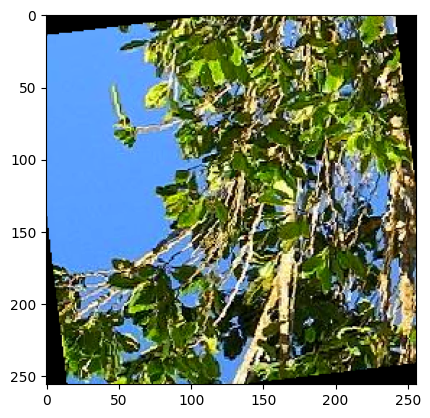

In [30]:
plt.imshow(train_img.numpy().transpose(1, 2, 0))

### All Dataset

In [31]:
len(train_dataset)

47013

In [32]:
len(test_dataset)

6545

In [33]:
train_loader = DataLoader(train_dataset)
test_loader = DataLoader(test_dataset)
val_loader = DataLoader(val_dataset)

In [34]:
img, modisvod_row, soil_row, worldclimbio_row, std_row, mean_row = next(iter(val_loader))
# img, modisvod_row, soil_row, worldclimbio_row, std_row, mean_row = next(iter(test_loader))

In [35]:
img.shape

torch.Size([1, 3, 512, 512])

In [36]:
img

tensor([[[[0.4275, 0.3804, 0.3333,  ..., 0.8980, 0.8627, 0.8314],
          [0.3490, 0.3647, 0.2784,  ..., 0.9216, 0.8902, 0.8627],
          [0.4902, 0.5333, 0.3961,  ..., 0.9490, 0.9255, 0.9098],
          ...,
          [0.5882, 0.5843, 0.5647,  ..., 0.8431, 0.8510, 0.8549],
          [0.6275, 0.6078, 0.5843,  ..., 0.8510, 0.8627, 0.8667],
          [0.6471, 0.6275, 0.5843,  ..., 0.8627, 0.8706, 0.8745]],

         [[0.4078, 0.3725, 0.3255,  ..., 0.9451, 0.9098, 0.8902],
          [0.3333, 0.3569, 0.2784,  ..., 0.9647, 0.9373, 0.9216],
          [0.4863, 0.5294, 0.3961,  ..., 0.9922, 0.9725, 0.9569],
          ...,
          [0.4784, 0.4745, 0.4588,  ..., 0.7843, 0.7922, 0.7961],
          [0.5098, 0.4980, 0.4745,  ..., 0.7922, 0.8039, 0.8078],
          [0.5333, 0.5137, 0.4745,  ..., 0.8039, 0.8118, 0.8157]],

         [[0.3216, 0.2824, 0.2353,  ..., 0.9294, 0.8941, 0.8706],
          [0.2353, 0.2588, 0.1765,  ..., 0.9490, 0.9216, 0.9020],
          [0.3686, 0.4118, 0.2863,  ..., 0

In [37]:
modisvod_row

tensor([[-0.2303, -0.3069,  0.6398,  0.7992, -0.5108,  0.5777,  0.3934, -0.3002,
          0.7152, -0.0909, -0.2983,  0.6204, -0.3604, -0.3719,  0.5699, -0.3847,
         -0.3716,  0.5215, -0.3327, -0.3514,  0.3609, -0.1570, -0.3999,  0.1320,
         -0.0277, -0.6024, -0.0682,  0.2598, -0.6108,  0.0633,  0.4714, -0.6877,
          0.2601,  0.8520, -0.5695,  0.5427, -1.4222, -1.5845, -1.4558, -1.6254,
         -1.2662, -1.4811, -1.1964, -1.4619, -0.2191, -0.3003, -0.3270, -0.3552,
         -0.4092, -0.5571, -0.5242, -0.5772, -0.4801, -0.4789, -0.2079, -0.1981]])

In [38]:
soil_row

tensor([[-0.3750,  0.0000, -0.2857, -0.1053, -0.3913,  0.0000, -0.7959, -0.4648,
         -1.0130, -0.6712, -0.8902, -0.4648, -0.0395, -0.0485, -0.1798, -0.2784,
         -0.0706, -0.1262, -1.1429,  0.3967, -0.0360,  0.5492, -0.8889,  0.6532,
         -0.2917, -0.5422, -0.6320, -0.5102, -0.4375, -0.4815,  0.3632,  2.8684,
          0.3717,  1.4353,  0.2766,  2.5867,  0.0000, -0.0714, -0.0625, -0.0667,
         -0.0667, -0.0714, -0.1333,  1.3500,  0.6784,  0.8969,  0.6190,  1.2564,
          0.5294, -0.9607, -1.1083, -1.0171, -1.0402, -0.9831, -1.0542,  0.0461,
          0.4286,  0.0110,  0.2308,  0.1324,  0.5194]])

In [39]:
worldclimbio_row

tensor([[-0.0235, -0.1907, -0.0969, -0.0144, -0.1353]])

In [40]:
std_row, mean_row

(tensor([[0., 0., 0., 0., 0., 0.]]),
 tensor([[0.7624, 2.3424, 1.7922, 2.2622, 1.3431, 6.1691]]))

In [41]:
torch.concat([modisvod_row, soil_row, worldclimbio_row], axis=1).shape

torch.Size([1, 122])

In [42]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)
val_loader = DataLoader(val_dataset, batch_size=64)

In [43]:
kwargs

{'n_feat': 122,
 'backbone_net': EfficientNet(
   (features): Sequential(
     (0): Conv2dNormActivation(
       (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (2): SiLU(inplace=True)
     )
     (1): Sequential(
       (0): MBConv(
         (block): Sequential(
           (0): Conv2dNormActivation(
             (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
             (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
             (2): SiLU(inplace=True)
           )
           (1): SqueezeExcitation(
             (avgpool): AdaptiveAvgPool2d(output_size=1)
             (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
             (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
             (activation): SiLU(inplace=True)
             (scale_activation): S

In [44]:
import torchvision

In [45]:
efficientnet_b2 = torchvision.models.efficientnet_b2(weights='IMAGENET1K_V1')

In [46]:
efficientnet_b2

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [47]:
efficientnet_b2.classifier = torch.nn.Identity()

In [48]:
efficientnet_b2(torch.rand((2, 3, 256, 256))).shape

torch.Size([2, 1408])

In [49]:
resnet18 = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

In [50]:
resnet18.fc = torch.nn.Identity() # żeby pozbyć się liniowego klasyfikatora i tylko wybrać reprezentację obrazka

In [51]:
kwargs['backbone_net'] = resnet18

In [52]:
kwargs

{'n_feat': 122,
 'backbone_net': ResNet(
   (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace=True)
   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (layer1): Sequential(
     (0): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
       (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
     (1): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [53]:
checkpoint_dir = Path(f'../models')
os.makedirs(checkpoint_dir, exist_ok=True)
model_name = 'test-model'
logger = TensorBoardLogger(save_dir='./tnsr-logs', name=model_name)
checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath=checkpoint_dir / model_name, filename='{epoch}-{val_loss:.2f}-{train_loss:.2f}', 
                                                                                   monitor='train_r2_score', save_last=True) 
# early_stopping = pl.callbacks.EarlyStopping(monitor='val_loss', verbose=True)

model = PTNN(**kwargs)
trainer = pl.Trainer(max_epochs=3, fast_dev_run=True, default_root_dir=checkpoint_dir / model_name, logger=logger)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.


In [54]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)

You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type       | Params | Mode 
-------------------------------------------------------
0 | climate_encoder | Sequential | 785 K  | train
1 | img_encoder     | Sequential | 11.3 M | train
2 | prediction_head | Sequential | 66.7 K | train
-------------------------------------------------------
984 K     Trainable params
11.2 M    Non-trainable params
12.2 M    Total params
48.643    Total estimated model params size (MB)
85        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.


In [55]:
test_preds = trainer.predict(model, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [56]:
test_preds

[tensor([[-0.2965,  0.9598, -0.1282,  0.5837,  0.1620,  1.8584],
         [-0.0372,  0.8095, -0.1297,  0.7000,  0.1248,  2.0092],
         [-0.1832,  0.6800, -0.1583,  0.5550,  0.2083,  1.9097],
         [-0.0525,  0.9816, -0.1211,  0.6502, -0.0123,  1.9555],
         [-0.1680,  1.0546, -0.1143,  0.7416,  0.1007,  1.9237],
         [-0.0643,  1.0336, -0.0826,  0.6980,  0.0398,  1.9240],
         [-0.0155,  0.8643, -0.2043,  0.7386,  0.2221,  1.9629],
         [-0.3282,  0.8853, -0.1645,  0.7342,  0.1517,  2.0484],
         [ 0.0897,  0.8794, -0.1555,  0.4877, -0.0627,  1.8305],
         [-0.1673,  0.9518, -0.0588,  0.7460,  0.0529,  1.8941],
         [-0.0406,  0.7526, -0.2651,  0.6978, -0.1476,  1.8799],
         [-0.0851,  0.8164, -0.1629,  0.5950,  0.0329,  1.8474],
         [-0.1650,  0.8369, -0.1892,  0.5760,  0.0928,  1.9931],
         [-0.2294,  0.6469, -0.2557,  0.6758,  0.1539,  1.9901],
         [-0.1358,  0.7867, -0.2356,  0.6446,  0.1318,  1.7856],
         [-0.2144,  0.981

In [57]:
test_preds

[tensor([[-0.2965,  0.9598, -0.1282,  0.5837,  0.1620,  1.8584],
         [-0.0372,  0.8095, -0.1297,  0.7000,  0.1248,  2.0092],
         [-0.1832,  0.6800, -0.1583,  0.5550,  0.2083,  1.9097],
         [-0.0525,  0.9816, -0.1211,  0.6502, -0.0123,  1.9555],
         [-0.1680,  1.0546, -0.1143,  0.7416,  0.1007,  1.9237],
         [-0.0643,  1.0336, -0.0826,  0.6980,  0.0398,  1.9240],
         [-0.0155,  0.8643, -0.2043,  0.7386,  0.2221,  1.9629],
         [-0.3282,  0.8853, -0.1645,  0.7342,  0.1517,  2.0484],
         [ 0.0897,  0.8794, -0.1555,  0.4877, -0.0627,  1.8305],
         [-0.1673,  0.9518, -0.0588,  0.7460,  0.0529,  1.8941],
         [-0.0406,  0.7526, -0.2651,  0.6978, -0.1476,  1.8799],
         [-0.0851,  0.8164, -0.1629,  0.5950,  0.0329,  1.8474],
         [-0.1650,  0.8369, -0.1892,  0.5760,  0.0928,  1.9931],
         [-0.2294,  0.6469, -0.2557,  0.6758,  0.1539,  1.9901],
         [-0.1358,  0.7867, -0.2356,  0.6446,  0.1318,  1.7856],
         [-0.2144,  0.981

In [58]:
# test_dataset.save_submission(test_preds, './submis.csv')